In [2]:
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

(13, 5887)
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.168
8     0.168
9     0.336
10    0.336
11    0.504
12    0.504
Name: radiation, dtype: float64
0.99765916422267


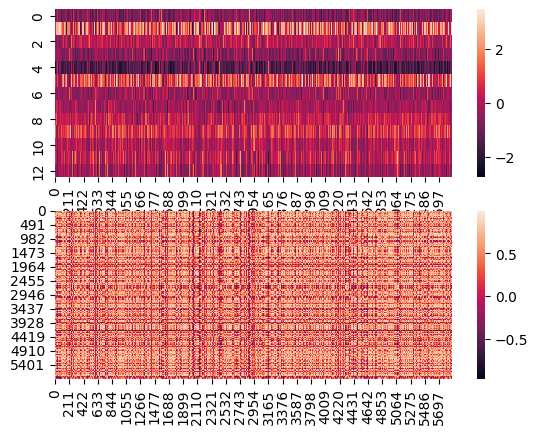

In [3]:
df = pd.read_csv("./cd_matrix_dA.csv")
X = df.values
print(X.shape)
skeleton = itertools.product(range(X.shape[1]), range(X.shape[1]-1)) 

# Correlation matrix with Permutation testing
fig, (data_ax, corr_ax) = plt.subplots(2)
print(df['radiation'])
#df_gene_expression = df.drop(columns=["radiation"])
df_gene_expression = df #.iloc[0:7] # remove the perturbed samples

num_genes = len(df_gene_expression.columns)
df_gene_expression = StandardScaler().fit_transform(df_gene_expression)
df_gene_expression = pd.DataFrame(data=df_gene_expression)
sns.heatmap(df_gene_expression, ax=data_ax)
corr_mat = df_gene_expression.corr('pearson', numeric_only=True).to_numpy()
np.fill_diagonal(corr_mat, 0)
print(np.max(corr_mat))
sns.heatmap(corr_mat, ax=corr_ax)
plt.show()

ValueError: The 'color' keyword argument must have one color per dataset, but 5887 datasets and 0 colors were provided

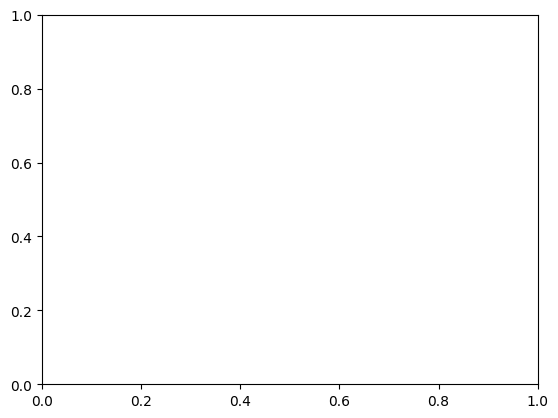

In [4]:
plt.hist(corr_mat, bins=np.arange(-1, 1, 0.1), color=[])

In [5]:
random_corr_coef = []
for i in range(10):
    shuffled_array = df_gene_expression.values
    [np.random.shuffle(x) for x in shuffled_array]
    shuffled_final_data_set = pd.DataFrame(data=shuffled_array)
    #sns.heatmap(shuffled_final_data_set, ax=data_ax)
    shuffle_corr_mat = shuffled_final_data_set.corr('pearson', numeric_only=True).to_numpy()
    np.fill_diagonal(shuffle_corr_mat, 0)
    # print(np.max(np.abs(shuffle_corr_mat)))
    #sns.heatmap(shuffle_corr_mat, ax=corr_ax)
    assert(np.max(np.abs(shuffle_corr_mat)) < np.max(np.abs(corr_mat)))
    #plt.hist(shuffle_corr_mat, bins=np.arange(-1, 1, 0.1))
    random_corr_coef.append(np.max(np.abs(shuffle_corr_mat)))
print(random_corr_coef)
ci_interval = st.t.interval(0.95, len(random_corr_coef)-1, 
                            loc=np.mean(random_corr_coef), 
                            scale=st.sem(random_corr_coef))
print(ci_interval)
cutoff = ci_interval[1]

corr_mat[np.abs(corr_mat)<=cutoff] = 0
corr_mat[np.abs(corr_mat)>cutoff] = 1
print(f"Superstructure contains {np.sum(corr_mat)} edges which is \
        {np.sum(corr_mat)/(corr_mat.shape[1]**2)} fraction of all possible edges")


[np.float64(0.9892144995097591), np.float64(0.9876190810610315), np.float64(0.9904876185152731), np.float64(0.9938250661495521), np.float64(0.9869150246034046), np.float64(0.9896260191093401), np.float64(0.9920520898204528), np.float64(0.9890042289160639), np.float64(0.9884712637875661), np.float64(0.9904816200728411)]
(np.float64(0.9882987146299823), np.float64(0.991240587679075))
Superstructure contains 718.0 edges which is         2.07174534937172e-05 fraction of all possible edges


In [ ]:
skeleton = [(i,j) for (i,j) in itertools.product(range(num_genes), range(num_genes)) if corr_mat[i,j] ==1]
genes = set()
for (i,j) in skeleton:
   print(df.columns[i])
   print(df.columns[j]) 
   
   genes.add(df.columns[i])
   genes.add(df.columns[j])
#print(len(genes), genes)

492 {'GBP4', 'KIF22', 'SLC38A10', 'MMRN1', 'CCNF', 'SULT1C4', 'CPTP', 'RPS8', 'SRSF11', 'STC1', 'KIF2C', 'RPS4X', 'TRA2B', 'EIF3L', 'TGFB2', 'SMS', 'CNTRL', 'CDH5', 'NEK3', 'RAF1', 'NUP88', 'LZTS2', 'ATP5MG', 'MARCHF6', 'SRSF7', 'EMILIN1', 'NMI', 'TUFM', 'RACK1', 'PLD1', 'BMP6', 'ZNF587', 'NEIL1', 'RSF1', 'FLI1', 'BUB3', 'FNTA', 'RPL18', 'MTR', 'EXOC7', 'MAGI1', 'TMEM185B', 'MCM7', 'DEAF1', 'MTHFD1', 'SFXN1', 'DLST', 'SMC2', 'SH3BP5', 'NCAPD2', 'MMADHC', 'SCD', 'KIF4A', 'FAM78A', 'LYRM1', 'DTYMK', 'CEP295', 'SELL', 'SLTM', 'PARP14', 'SERINC3', 'NFATC2IP', 'TPR', 'CDCA7L', 'RPL37A', 'LTA4H', 'ATIC', 'TCOF1', 'CAP1', 'MBD2', 'CNOT6L', 'NEK9', 'NORAD', 'ANKRD28', 'ACIN1', 'TM4SF18', 'SNX6', 'PRR11', 'FANCG', 'RFC3', 'GIMAP7', 'RPL32', 'GIMAP8', 'CENPF', 'MCM8', 'MEGF6', 'INO80C', 'MXD3', 'TAPBPL', 'CPNE2', 'BAIAP2-DT', 'SLC25A36', 'BUB1B', 'RPL6', 'RALGAPA2', 'PPIE', 'CCAR1', 'ARNT', 'TXN', 'RPL28', 'PDLIM5', 'HYAL2', 'LMNA', 'TPX2', 'HNRNPA1L2', 'SMC3', 'MELK', 'JDP2', 'RAN', 'LRIG3', 'R